In [8]:
'''
Age (numeric)
Sex (text: male, female)
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
Housing (text: own, rent, or free)
Saving accounts (text - little, moderate, quite rich, rich)
Checking account (numeric, in DM - Deutsch Mark)
Credit amount (numeric, in DM)
Duration (numeric, in month)
Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
Risk (Value target - Good or Bad Risk)
'''

'\nAge (numeric)\nSex (text: male, female)\nJob (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)\nHousing (text: own, rent, or free)\nSaving accounts (text - little, moderate, quite rich, rich)\nChecking account (numeric, in DM - Deutsch Mark)\nCredit amount (numeric, in DM)\nDuration (numeric, in month)\nPurpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others\nRisk (Value target - Good or Bad Risk)\n'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.getcwd()
os.listdir()
df_credit = pd.read_csv('german_credit_data_with_target.csv')
df_credit.head()
df_credit.info()### to check the not null counts 
df_credit.describe()###to check the min max and mean values
df_credit.nunique()###to check the unique values in each column



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

In [2]:
###Feature engineering (binning) for age variable , Making Age Categorical
df_credit.describe()##we checked that the min age is 19 and max age is 75, we generize this further
bins = [18,25,35,60,100]
age_categories = ['Student','Young','Adult','Senior']
##help(pd.cut)
df_credit['Age_cat'] = pd.cut(df_credit['Age'],bins,labels = age_categories)
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,2,49,male,1,own,little,NaN,2096,12,education,good,Adult
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,4,53,male,2,free,little,little,4870,24,car,bad,Adult


In [3]:
###looking at distinct values
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Age_cat : ",df_credit['Age_cat'].unique())##please note Age_cat is ordinal data(Student < Young < Adult < Senior)
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())


Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Age_cat :  [Senior, Student, Adult, Young]
Categories (4, object): [Student < Young < Adult < Senior]
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']


In [4]:
###Fill NAN with legit values, We saw above that Checking Account and Saving account has nan values, lets fill no_inf
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')
print(df_credit['Checking account'].unique() )
df_credit['Saving accounts'] = df_credit['Checking account'].fillna('no_inf')
print(df_credit['Saving accounts'].unique() )


['little' 'moderate' 'no_inf' 'rich']
['little' 'moderate' 'no_inf' 'rich']


In [5]:
##help(pd.merge) merging the dummy columns to the original dataframe
#Dummies for purpose
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
df_credit.head(10)
##Dummies for Sex
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex,drop_first = True, prefix='Sex'), left_index=True, right_index=True)
df_credit.head(10)
##Dummies for housing 
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True,prefix='Housing'),left_index=True, right_index=True)
df_credit.head(10)
##Dummies for Checking Account 
df_credit = df_credit.merge(pd.get_dummies(df_credit['Checking account'],drop_first=True,prefix='Checking'),left_index=True,right_index=True)
df_credit.head(10)
##Dummies for Saving account 
df_credit = df_credit.merge(pd.get_dummies(df_credit['Saving accounts'],drop_first=True,prefix='Saving'),left_index=True,right_index=True)
df_credit.head(10)
##Dummies for Age_cat
df_credit = df_credit.merge(pd.get_dummies(df_credit.Age_cat,drop_first=True,prefix='Age_cat'),left_index=True,right_index=True)
df_credit.head(10)
##Dummies for Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk,drop_first=True,prefix='Risk'),left_index=True,right_index=True)
df_credit.head(10)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,...,Checking_moderate,Checking_no_inf,Checking_rich,Saving_moderate,Saving_no_inf,Saving_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,Risk_good
0,0,67,male,2,own,little,little,1169,6,radio/TV,...,0,0,0,0,0,0,0,0,1,1
1,1,22,female,2,own,moderate,moderate,5951,48,radio/TV,...,1,0,0,1,0,0,0,0,0,0
2,2,49,male,1,own,no_inf,no_inf,2096,12,education,...,0,1,0,0,1,0,0,1,0,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,...,0,0,0,0,0,0,0,1,0,1
4,4,53,male,2,free,little,little,4870,24,car,...,0,0,0,0,0,0,0,1,0,0
5,5,35,male,1,free,no_inf,no_inf,9055,36,education,...,0,1,0,0,1,0,1,0,0,1
6,6,53,male,2,own,no_inf,no_inf,2835,24,furniture/equipment,...,0,1,0,0,1,0,0,1,0,1
7,7,35,male,3,rent,moderate,moderate,6948,36,car,...,1,0,0,1,0,0,1,0,0,1
8,8,61,male,1,own,no_inf,no_inf,3059,12,radio/TV,...,0,1,0,0,1,0,0,0,1,1
9,9,28,male,3,own,moderate,moderate,5234,30,car,...,1,0,0,1,0,0,1,0,0,0


In [6]:
#Deleting the existing columns on which hot encoding has been done
print(df_credit.info())
df_credit.drop(['Saving accounts','Checking account','Purpose','Sex','Housing','Age_cat','Risk'],axis=1,inplace=True)
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
Unnamed: 0                     1000 non-null int64
Age                            1000 non-null int64
Sex                            1000 non-null object
Job                            1000 non-null int64
Housing                        1000 non-null object
Saving accounts                1000 non-null object
Checking account               1000 non-null object
Credit amount                  1000 non-null int64
Duration                       1000 non-null int64
Purpose                        1000 non-null object
Risk                           1000 non-null object
Age_cat                        1000 non-null category
Purpose_car                    1000 non-null uint8
Purpose_domestic appliances    1000 non-null uint8
Purpose_education              1000 non-null uint8
Purpose_furniture/equipment    1000 non-null uint8
Purpose_radio/TV               1000 non-null uint8
Purpose_repairs   

In [7]:
##Importing the Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score



In [8]:
####Applying the logrithm function to make it Normal distribution and handling Outlarity
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [9]:
df_credit.head(10)
X = df_credit.drop('Risk_good',axis=1)
y = df_credit['Risk_good']
X.head()
y.head()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


LR: 0.883563 (0.042481)
KNN: 0.814804 (0.041190)
CART: 0.761430 (0.031274)
NB: 0.690856 (0.048956)
RF: 0.854862 (0.052587)
SVM: 0.977177 (0.020559)


/Users/rahuljain/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/rahuljain/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/rahuljain/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/rahuljain/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

XGB: 0.898803 (0.050789)


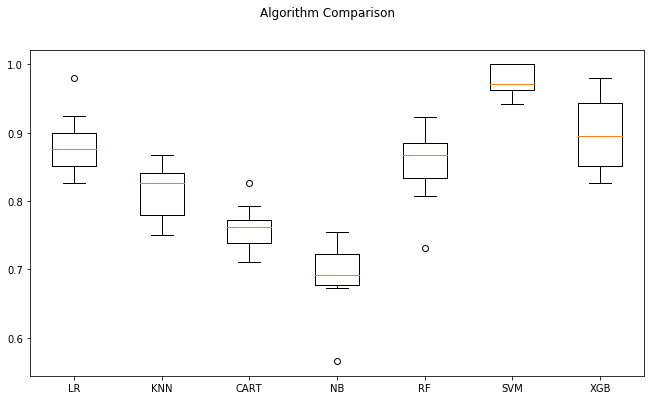

In [10]:
################CROSS VALIDATION TECHNIQUE TO ACCESS MODELS####################
####setting the seed for random number generation
seed = 10
###creating a list of tuples to hold the models for cross validation
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=30)))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluating each model by iteration
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results) 
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
###Plotting a boxplot
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [11]:
###We see above that the XGBoost, Random Forest, SVM and Logistic Reg are doing the best job classifying. We are going to run our test data through it now
###Model 1 Random Forest Classifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

rfc = RandomForestClassifier(n_estimators=60, criterion='gini',random_state=0,  warm_start = True)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

print('Randon Forest Results')
print('accuracy_score: ',accuracy_score(y_test,y_pred)*100)
print("\n")
print('confusion_matrix: ','\n',confusion_matrix(y_test, y_pred))
print("\n")
print('f1_score: ',f1_score(y_test, y_pred))
####Best accuracy i could achieve by tuning the model is 76%

Randon Forest Results
accuracy_score:  76.0


confusion_matrix:  
 [[ 37  37]
 [ 23 153]]


f1_score:  0.8360655737704917


In [19]:
###Model2 Support Vector Machine
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train,y_train)
y_pred =svm.predict(X_test)

print('Support Vector Machine')
print('accuracy_score: ',accuracy_score(y_test,y_pred)*100)
print("\n")
print('confusion_matrix: ','\n',confusion_matrix(y_test, y_pred))
print("\n")
print('f1_score: ',f1_score(y_test, y_pred))
###best possible result is 72%

Support Vector Machine
accuracy_score:  72.0


confusion_matrix:  
 [[  4  70]
 [  0 176]]


f1_score:  0.8341232227488152


In [30]:
###Model3 Logistic Regression
lr = LogisticRegression(random_state=1,warm_start=True,solver='liblinear')
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)

print('Logistic Regression')
print('accuracy_score: ',accuracy_score(y_test,y_pred)*100)
print("\n")
print('confusion_matrix: ','\n',confusion_matrix(y_test, y_pred))
print("\n")
print('f1_score: ',f1_score(y_test, y_pred))

##BEst possible solution is 74%

Logistic Regression
accuracy_score:  74.0


confusion_matrix:  
 [[ 29  45]
 [ 20 156]]


f1_score:  0.8275862068965517


In [31]:
###Model4 XGboost
xgc = XGBClassifier(random_state=0,)
xgc.fit(X_train,y_train)
y_pred =xgc.predict(X_test)

print('XGboost')
print('accuracy_score: ',accuracy_score(y_test,y_pred)*100)
print("\n")
print('confusion_matrix: ','\n',confusion_matrix(y_test, y_pred))
print("\n")
print('f1_score: ',f1_score(y_test, y_pred))
##BEst possible score is 75.6%

XGboost
accuracy_score:  75.6


confusion_matrix:  
 [[ 31  43]
 [ 18 158]]


f1_score:  0.8381962864721485


/Users/rahuljain/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
###Mode5 Decision Tree
dtc = DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=39)
dtc.fit(X_train,y_train)
y_pred =dtc.predict(X_test)

print('Decision Tree')
print('accuracy_score: ',accuracy_score(y_test,y_pred)*100)
print("\n")
print('confusion_matrix: ','\n',confusion_matrix(y_test, y_pred))
print("\n")
print('f1_score: ',f1_score(y_test, y_pred))
##BEst possible score is 68.8%

Decision Tree
accuracy_score:  68.8


confusion_matrix:  
 [[ 34  40]
 [ 38 138]]


f1_score:  0.7796610169491526


In [44]:
'''
Looking at the above results, Random forest model is the best predictor 
Randon Forest Results
accuracy_score:  76.0


confusion_matrix:  
 [[ 37  37]
 [ 23 153]]

f1_score:  0.8360655737704917
'''

'\nLooking at the above results, Random forest model is the best predictor \nRandon Forest Results\naccuracy_score:  76.0\n\n\nconfusion_matrix:  \n [[ 37  37]\n [ 23 153]]\n\nf1_score:  0.8360655737704917\n'